# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [2]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [3]:
random_hash = "ZzJ"
adata = sc.read_h5ad("/tmp/deepsem_"+random_hash+".h5ad")

In [4]:
adata.write("/tmp/deepsem_"+random_hash+".h5ad")

In [5]:
adata.X

<807x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 546204 stored elements in Compressed Sparse Row format>

In [6]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [7]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [8]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
#adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 15728 × 23149
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3'

In [9]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

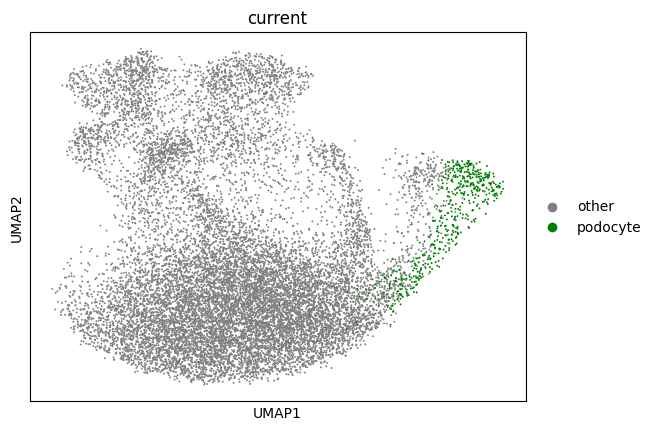

In [10]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


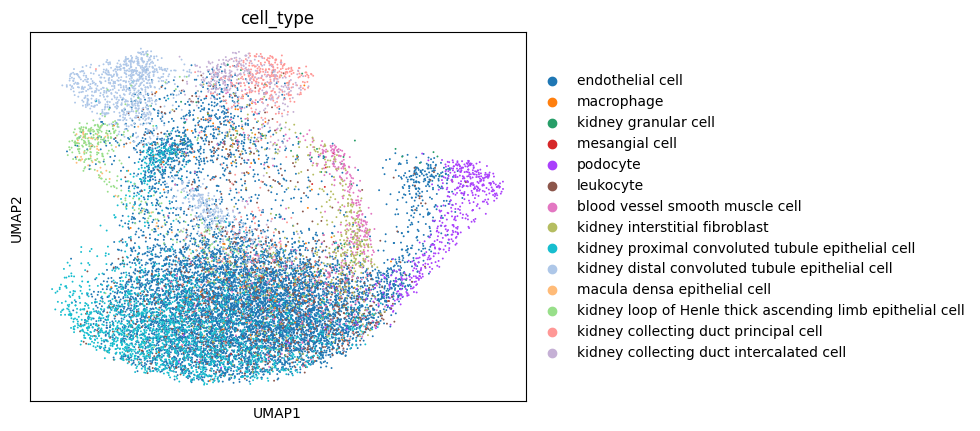

In [11]:
sc.pl.umap(adata, color=['cell_type'])

In [12]:
CELLTYPES

['kidney distal convoluted tubule epithelial cell',
 'kidney loop of Henle thick ascending limb epithelial cell',
 'kidney collecting duct principal cell',
 'mesangial cell',
 'blood vessel smooth muscle cell',
 'podocyte',
 'macrophage',
 'leukocyte',
 'kidney interstitial fibroblast']

In [13]:
adata.obs.cell_type.unique()

['endothelial cell', 'macrophage', 'kidney granular cell', 'mesangial cell', 'podocyte', ..., 'kidney distal convoluted tubule epithelial cell', 'macula densa epithelial cell', 'kidney loop of Henle thick ascending limb epi..., 'kidney collecting duct principal cell', 'kidney collecting duct intercalated cell']
Length: 14
Categories (14, object): ['endothelial cell', 'macrophage', 'kidney granular cell', 'mesangial cell', ..., 'macula densa epithelial cell', 'kidney loop of Henle thick ascending limb epi..., 'kidney collecting duct principal cell', 'kidney collecting duct intercalated cell']

(4768, 23149)
(4768, 23149)
nbJ
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.43870885784809405 mse_loss: 0.38903824297281414 kl_loss: 0.049237964603190236 sparse_loss: 0.0004326465736644772
epoch: 2 0.4458114355802536 mse_loss: 0.3911567055262052 kl_loss: 0.05416845000134064 sparse_loss: 0.0004862769990443037
epoch: 4 0.3165092651660626 mse_loss: 0.2721001012967183 kl_loss: 0.04391059265113794 sparse_loss: 0.0004985739673989323
epoch: 5 0.25823481724812436 mse_loss: 0.21325631095812872 kl_loss: 0.04447488887951924 sparse_loss: 0.000503615986627455
epoch: 7 0.2681684516943418 mse_loss: 0.22217449431235975 kl_loss: 0.04548495764342638 sparse_loss: 0.0005089982341115291
epoch: 8 0.3744951131252142 mse_loss: 0.3278373789328795 kl_loss: 0.04613946994336752 sparse_loss: 0.0005182679339598578
epoch: 10 0.23875712603330612 mse_loss: 0.19334500856124437 kl_loss: 0.04488675597195442 sparse_loss: 0.0005253639537841082
epoch: 11 0.24838554228727633 mse_loss: 0.20269887550519064 kl_loss: 0.04515692477042858 sparse_loss: 0.0005297365043169031
epoch: 13 0.215779806

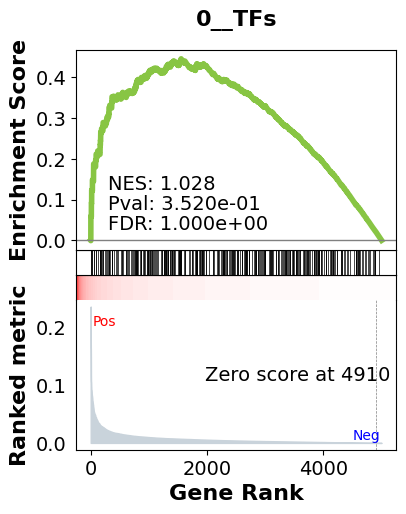

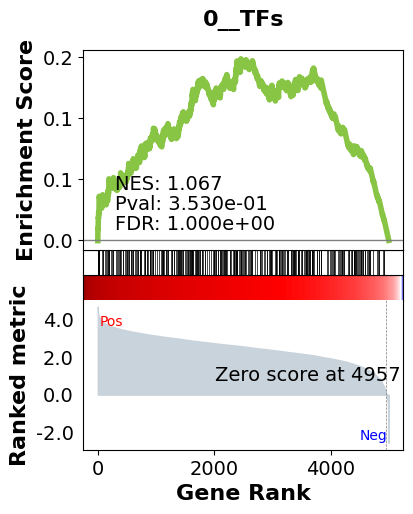

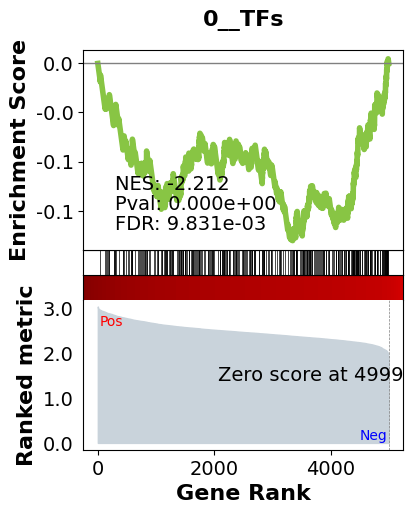

_________________________________________
TF specific enrichment
found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3565 genes
intersection pct: 0.713
precision:  0.0010620463635891406 
recall:  0.9998518079430943 
random precision: 0.001062203773751226


 98%|█████████▊| 126/128 [00:09<00:00, 13.16it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


Average Precision (AP):  0.001028944431712503
Area Under Precision-Recall Curve (AUPRC):  0.0010281938869451195
EPR: 1.0464565125934673


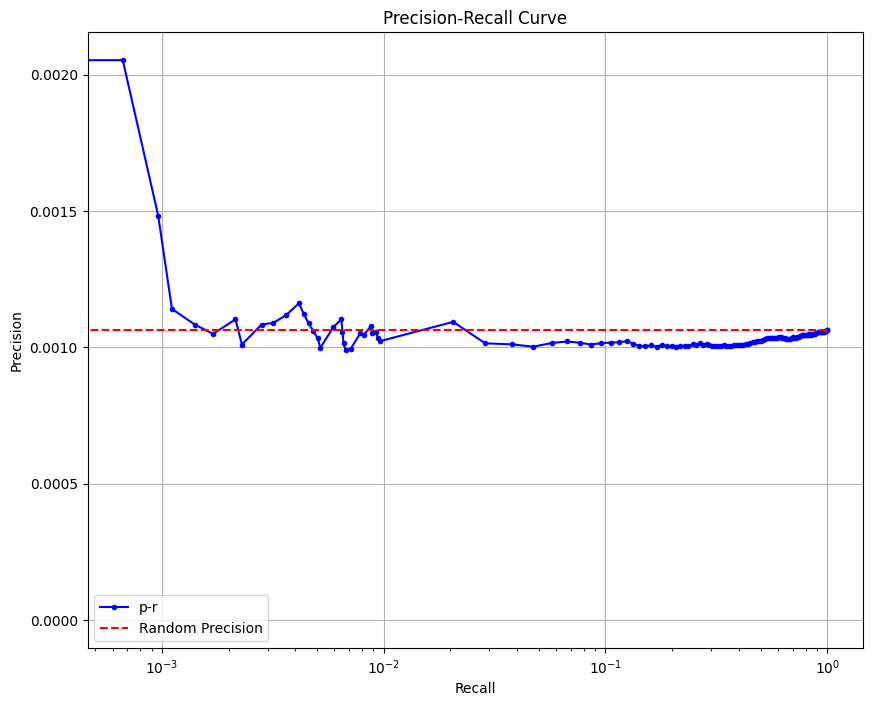

base enrichment
Top central genes: []


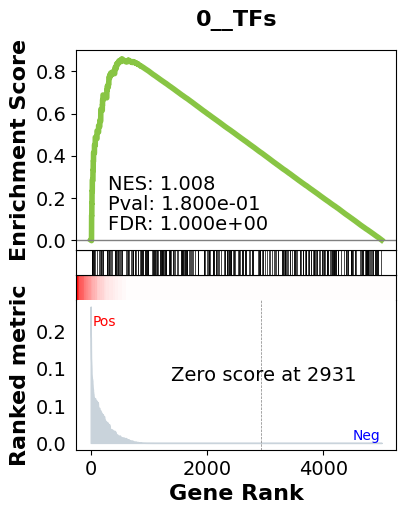

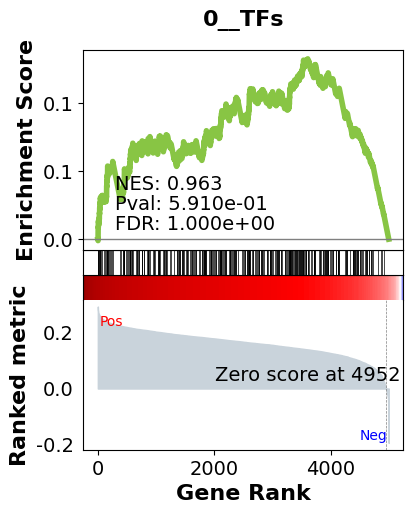

_________________________________________
TF specific enrichment
found some significant results for  5.882352941176471 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3565 genes
intersection pct: 0.713
precision:  0.004536435786435786 
recall:  0.33543272080616476 
random precision: 0.001062203773751226


 98%|█████████▊| 126/128 [00:08<00:00, 13.79it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 14.01it/s]


Average Precision (AP):  0.0022419044226743624
Area Under Precision-Recall Curve (AUPRC):  0.0021256049381985043
EPR: 4.781478491095704


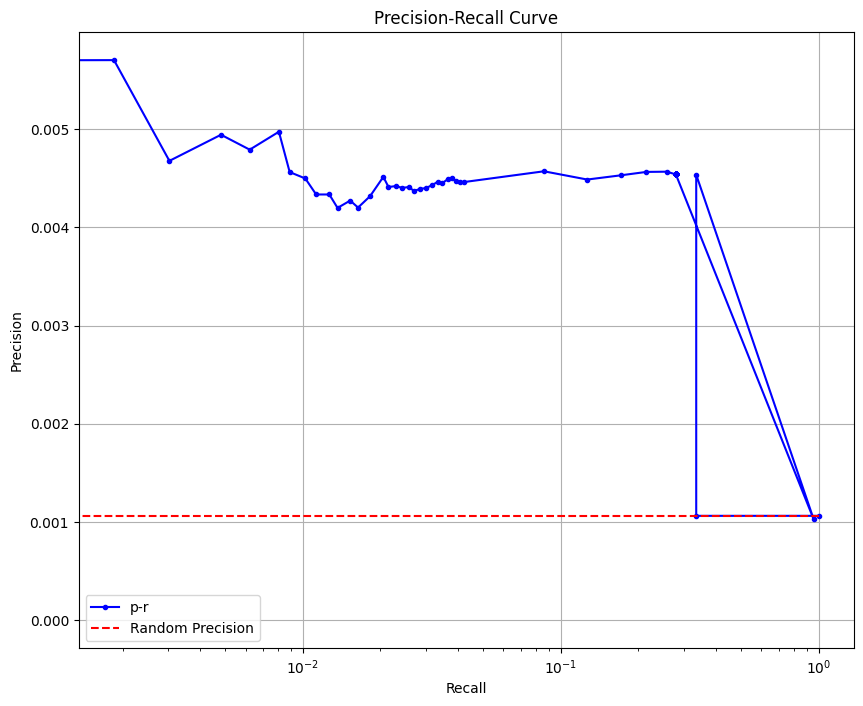

(4768, 23149)
SCy
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.6395553648471832 mse_loss: 0.6073541194200516 kl_loss: 0.03184670675545931 sparse_loss: 0.00035452387965051457
epoch: 2 0.606098547577858 mse_loss: 0.5683929771184921 kl_loss: 0.03726973943412304 sparse_loss: 0.0004358170845080167
epoch: 4 0.5266682282090187 mse_loss: 0.48487576842308044 kl_loss: 0.04131929390132427 sparse_loss: 0.0004731448643724434
epoch: 5 0.4983557462692261 mse_loss: 0.45407477021217346 kl_loss: 0.04378173965960741 sparse_loss: 0.0004992322938051075
epoch: 7 0.5090442076325417 mse_loss: 0.4576096683740616 kl_loss: 0.050917255226522684 sparse_loss: 0.0005172829405637458
epoch: 8 0.3676411584019661 mse_loss: 0.3154563307762146 kl_loss: 0.051654058042913675 sparse_loss: 0.0005307750980136916
epoch: 10 0.4039061665534973 mse_loss: 0.35503455251455307 kl_loss: 0.04833316104486585 sparse_loss: 0.000538463587872684
epoch: 11 0.488333985209465 mse_loss: 0.4391905292868614 kl_loss: 0.04859611392021179 sparse_loss: 0.0005473457422340289
epoch: 13 0.393678009510040

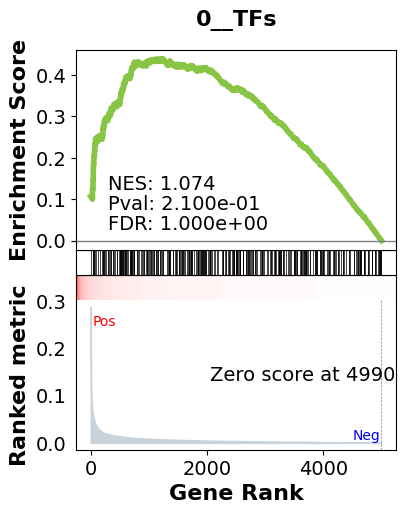

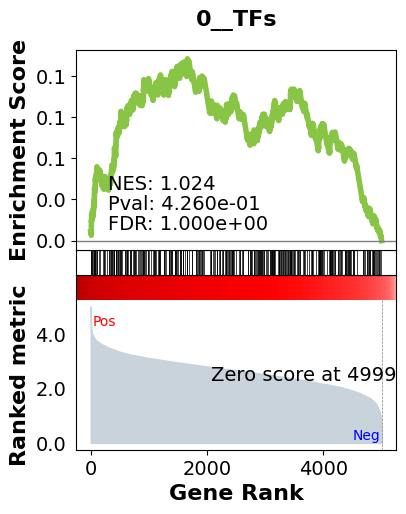

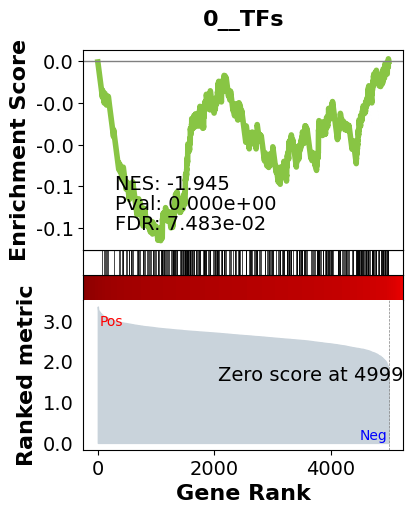

_________________________________________
TF specific enrichment
found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3514 genes
intersection pct: 0.7028
precision:  0.0012120198803014933 
recall:  0.9999331684822562 
random precision: 0.0012121008868434197


 98%|█████████▊| 126/128 [00:08<00:00, 14.68it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Average Precision (AP):  0.0011974334188889376
Area Under Precision-Recall Curve (AUPRC):  0.0011969193906026861
EPR: 0.8819384747093888


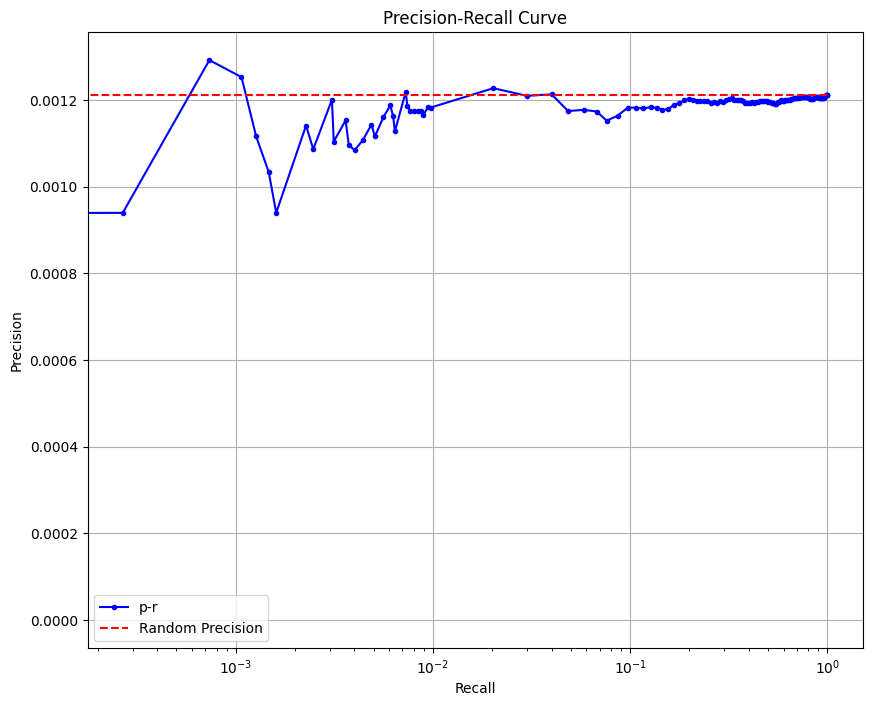

base enrichment
Top central genes: []


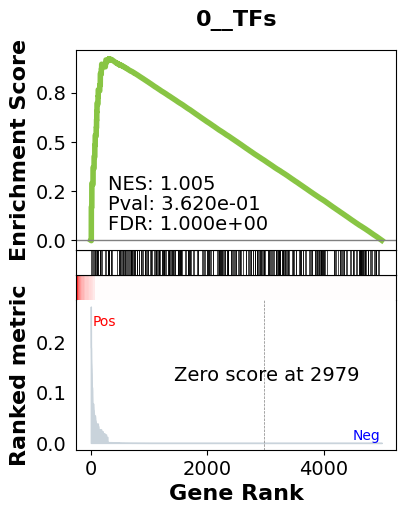

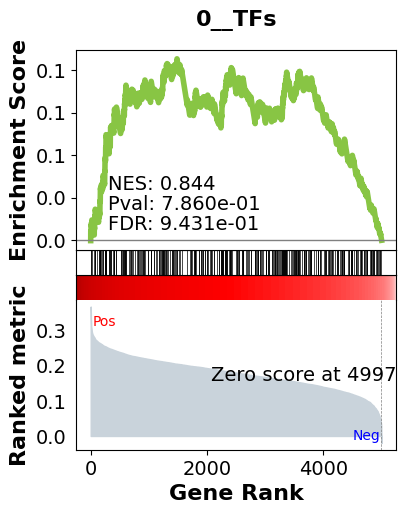

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3514 genes
intersection pct: 0.7028
precision:  0.0060679381345478695 
recall:  0.4273875559713961 
random precision: 0.0012121008868434197


 99%|█████████▉| 127/128 [00:07<00:00, 16.85it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 16.00it/s]


Average Precision (AP):  0.003341823194433075
Area Under Precision-Recall Curve (AUPRC):  0.0031347525738475166
EPR: 5.574634296205779


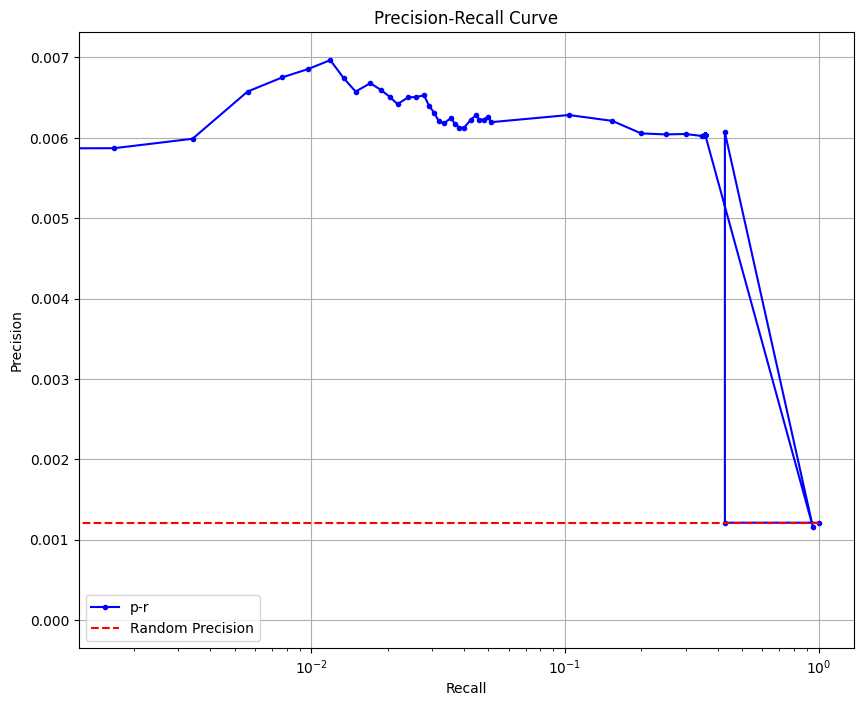

(4768, 23149)
sVq
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.5753175963958105 mse_loss: 0.541003942489624 kl_loss: 0.03395041427575052 sparse_loss: 0.00036323229141999036
epoch: 2 0.5766823838154475 mse_loss: 0.5367938826481501 kl_loss: 0.039449488278478384 sparse_loss: 0.000438997769379057
epoch: 4 0.3862444907426834 mse_loss: 0.33536762992540997 kl_loss: 0.05039605560402075 sparse_loss: 0.00048081480781547725
epoch: 5 0.5571108311414719 mse_loss: 0.5005190869172415 kl_loss: 0.056076894203821816 sparse_loss: 0.0005148553949159881
epoch: 7 0.32817206035057706 mse_loss: 0.27240440746148425 kl_loss: 0.05523269809782505 sparse_loss: 0.0005349582352209836
epoch: 8 0.366809422771136 mse_loss: 0.31008482972780865 kl_loss: 0.05618272473414739 sparse_loss: 0.000541879494752114
epoch: 10 0.31044189383586246 mse_loss: 0.26050008336702984 kl_loss: 0.04939409500608841 sparse_loss: 0.000547728055001547
epoch: 11 0.35227371752262115 mse_loss: 0.3020240217447281 kl_loss: 0.049698332945505776 sparse_loss: 0.0005513745030233016
epoch: 13 0.30189114560

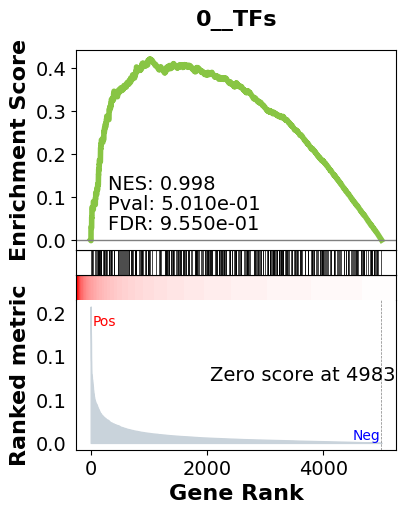

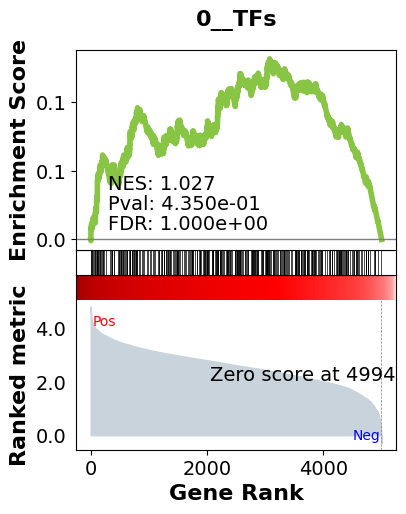

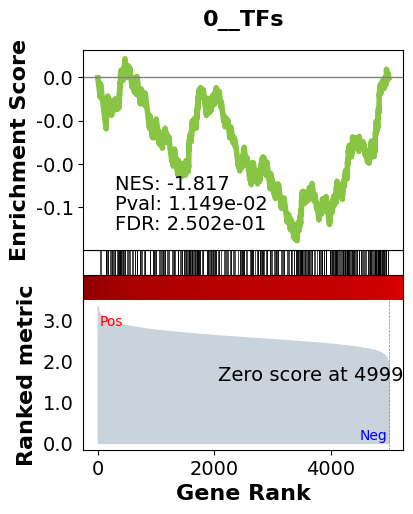

_________________________________________
TF specific enrichment
found some significant results for  2.857142857142857 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3594 genes
intersection pct: 0.7188
precision:  0.0013617804111469452 
recall:  0.9998862796383693 
random precision: 0.0013619352909207464


 98%|█████████▊| 126/128 [00:08<00:00, 13.93it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 15.34it/s]


Average Precision (AP):  0.0013604957120221966
Area Under Precision-Recall Curve (AUPRC):  0.0013585753716160694
EPR: 1.1276293352826106


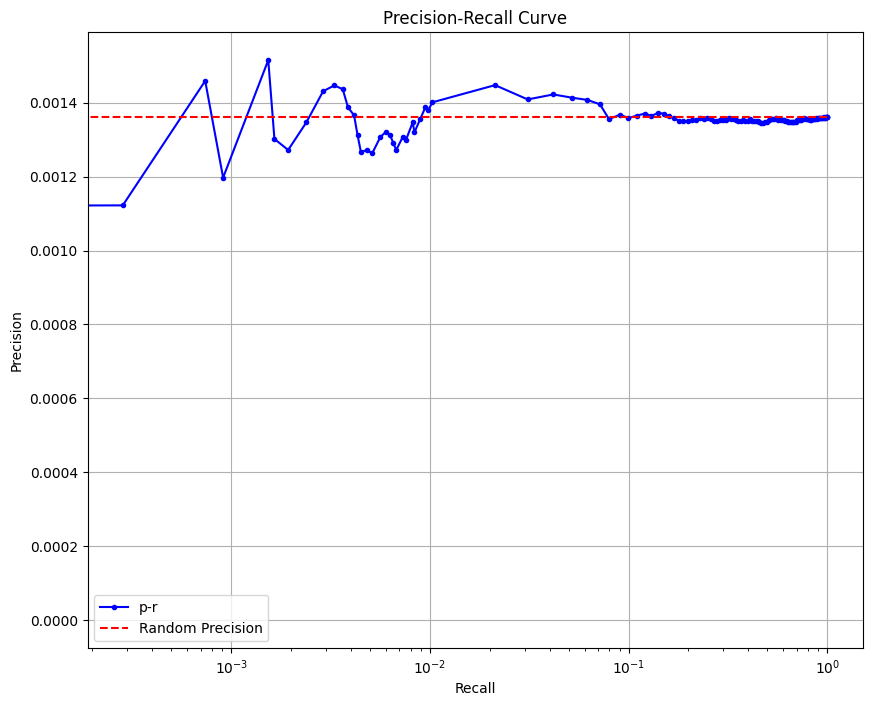

base enrichment
Top central genes: []


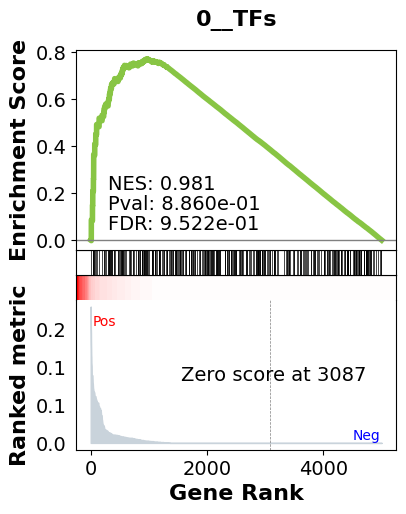

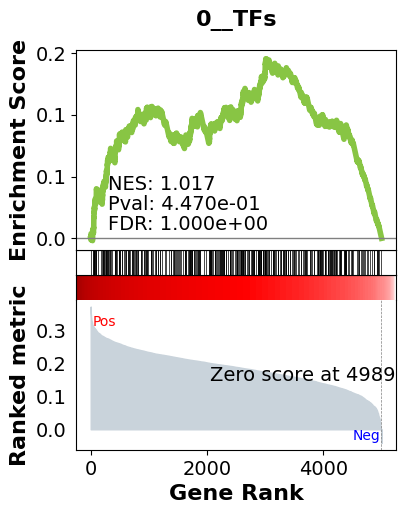

_________________________________________
TF specific enrichment
found some significant results for  8.571428571428571 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3594 genes
intersection pct: 0.7188
precision:  0.0069856273237848526 
recall:  0.4452720759652016 
random precision: 0.0013619352909207464


 98%|█████████▊| 126/128 [00:09<00:00, 13.59it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 13.84it/s]


Average Precision (AP):  0.003922377614456757
Area Under Precision-Recall Curve (AUPRC):  0.003753360118757877
EPR: 6.784702824605764


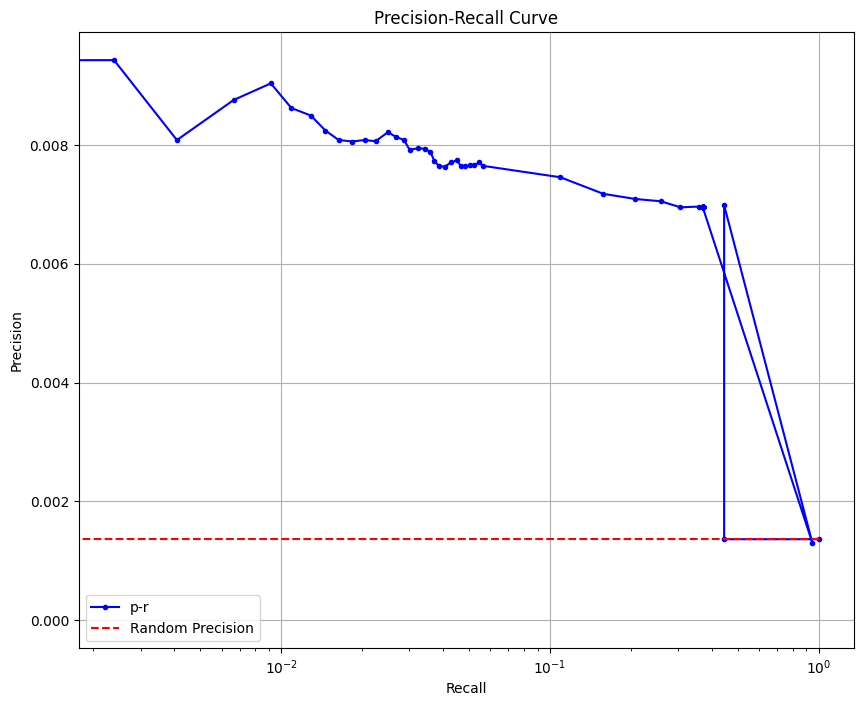

(4768, 23149)
F0N
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.29854699969291687 mse_loss: 0.27495867013931274 kl_loss: 0.023288339842110872 sparse_loss: 0.000299987819744274
epoch: 2 0.294232040643692 mse_loss: 0.27062517404556274 kl_loss: 0.023308880801778287 sparse_loss: 0.0002979864948429167
epoch: 4 0.28885576128959656 mse_loss: 0.2649536728858948 kl_loss: 0.0235817109933123 sparse_loss: 0.0003203774685971439
epoch: 5 0.2887594401836395 mse_loss: 0.2648771405220032 kl_loss: 0.02356196875916794 sparse_loss: 0.00032035692129284143
epoch: 7 0.2718196213245392 mse_loss: 0.24788428843021393 kl_loss: 0.023614910780452192 sparse_loss: 0.00032044100225903094
epoch: 8 0.27432629466056824 mse_loss: 0.2503674328327179 kl_loss: 0.02362750784959644 sparse_loss: 0.00033137420541606843
epoch: 10 0.2654367983341217 mse_loss: 0.24126413464546204 kl_loss: 0.023831863538362086 sparse_loss: 0.0003407871990930289
epoch: 11 0.26578468084335327 mse_loss: 0.24160084128379822 kl_loss: 0.023835287080146372 sparse_loss: 0.00034855896956287324
epoch: 13 0.257

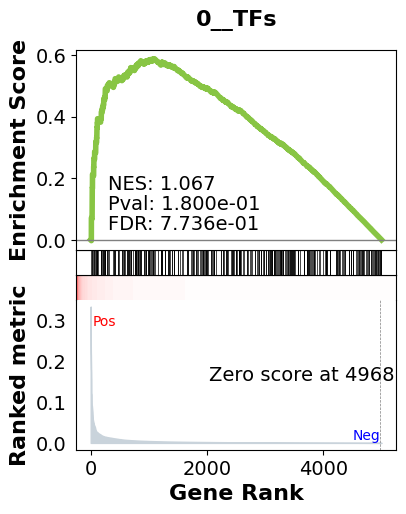

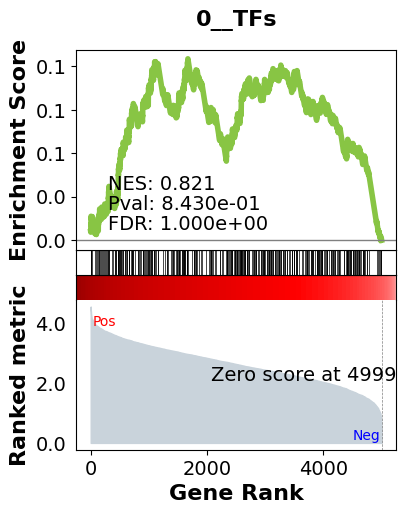

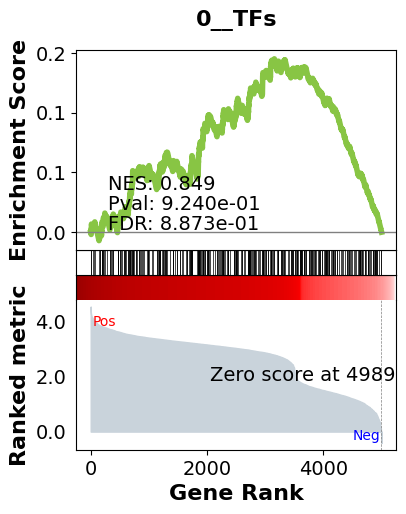

_________________________________________
TF specific enrichment
found some significant results for  59.09090909090909 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3199 genes
intersection pct: 0.6398
precision:  0.0010710234065093435 
recall:  0.9999087424712538 
random precision: 0.0010711211543788797


 99%|█████████▉| 127/128 [00:07<00:00, 17.41it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:07<00:00, 17.79it/s]


Average Precision (AP):  0.0010849950140457273
Area Under Precision-Recall Curve (AUPRC):  0.0010836096283066373
EPR: 0.937053213758387


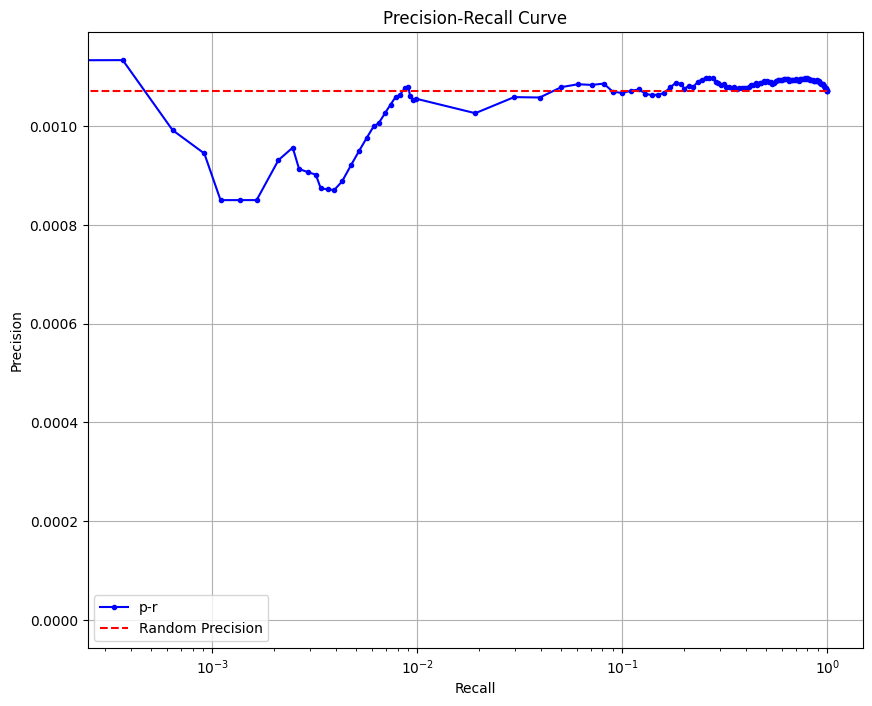

base enrichment
Top central genes: []


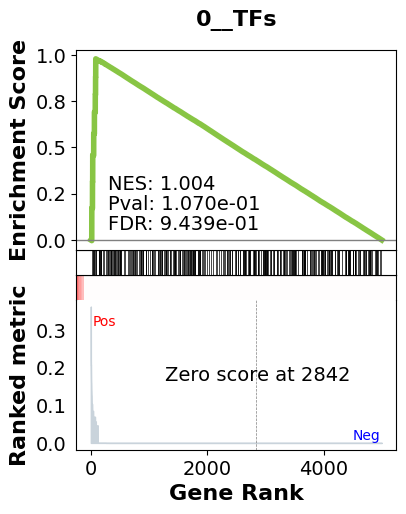

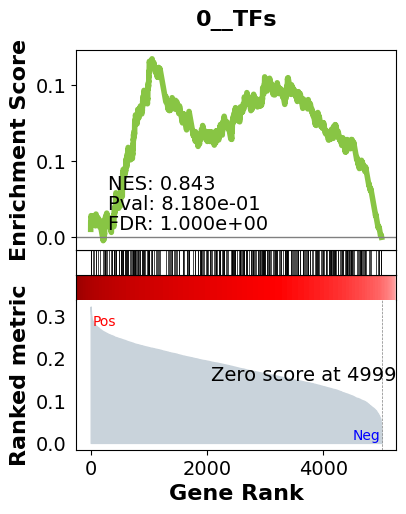

_________________________________________
TF specific enrichment
found some significant results for  6.818181818181818 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3199 genes
intersection pct: 0.6398
precision:  0.006103856856844252 
recall:  0.5308450447161891 
random precision: 0.0010711211543788797


 98%|█████████▊| 126/128 [00:07<00:00, 17.90it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:07<00:00, 17.93it/s]


Average Precision (AP):  0.004021719437220312
Area Under Precision-Recall Curve (AUPRC):  0.003869261291564279
EPR: 5.766382865425338


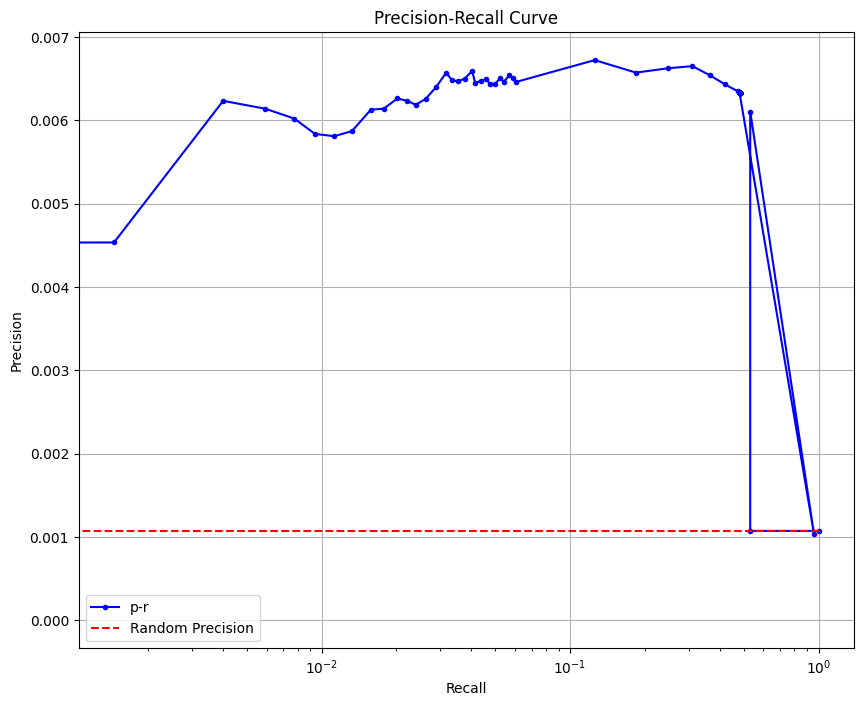

(4768, 23149)
sh7
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.9027329683303833 mse_loss: 0.8788171261548996 kl_loss: 0.023609186784597114 sparse_loss: 0.0003066427743760869
epoch: 2 0.916818231344223 mse_loss: 0.892979770898819 kl_loss: 0.023501280171331018 sparse_loss: 0.0003371857092133723
epoch: 4 0.6772054582834244 mse_loss: 0.6506393253803253 kl_loss: 0.02619193191640079 sparse_loss: 0.00037416861596284434
epoch: 5 0.655031755566597 mse_loss: 0.6279774904251099 kl_loss: 0.026641704607754946 sparse_loss: 0.00041253613744629547
epoch: 7 0.3743807226419449 mse_loss: 0.3409338966012001 kl_loss: 0.033004046068526804 sparse_loss: 0.00044279750727582723
epoch: 8 0.36107634007930756 mse_loss: 0.3228442445397377 kl_loss: 0.03775714500807226 sparse_loss: 0.0004749623403768055
epoch: 10 0.3589956909418106 mse_loss: 0.3152513690292835 kl_loss: 0.0432463432662189 sparse_loss: 0.0004979894729331136
epoch: 11 0.37769119814038277 mse_loss: 0.33098432049155235 kl_loss: 0.046189585234969854 sparse_loss: 0.0005172989622224122
epoch: 13 0.20919207856

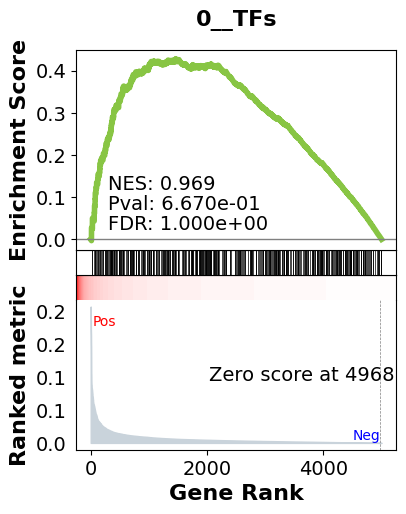

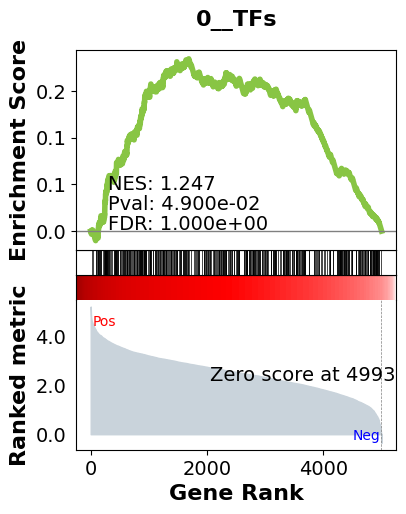

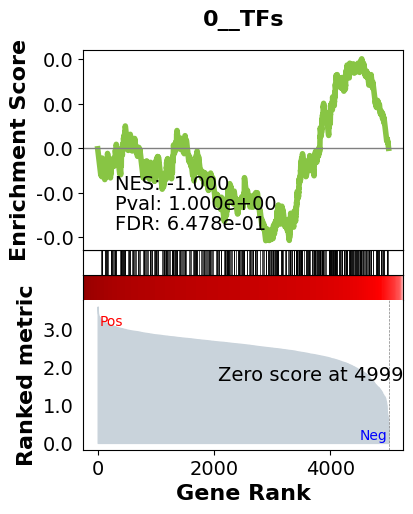

_________________________________________
TF specific enrichment
found some significant results for  19.642857142857142 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3625 genes
intersection pct: 0.725
precision:  0.001671842886503768 
recall:  0.9999089460505349 
random precision: 0.0016719951282636828


 99%|█████████▉| 127/128 [00:08<00:00, 13.13it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 14.20it/s]


Average Precision (AP):  0.0017271890882925404
Area Under Precision-Recall Curve (AUPRC):  0.0017266151507698614
EPR: 1.1988777538768887


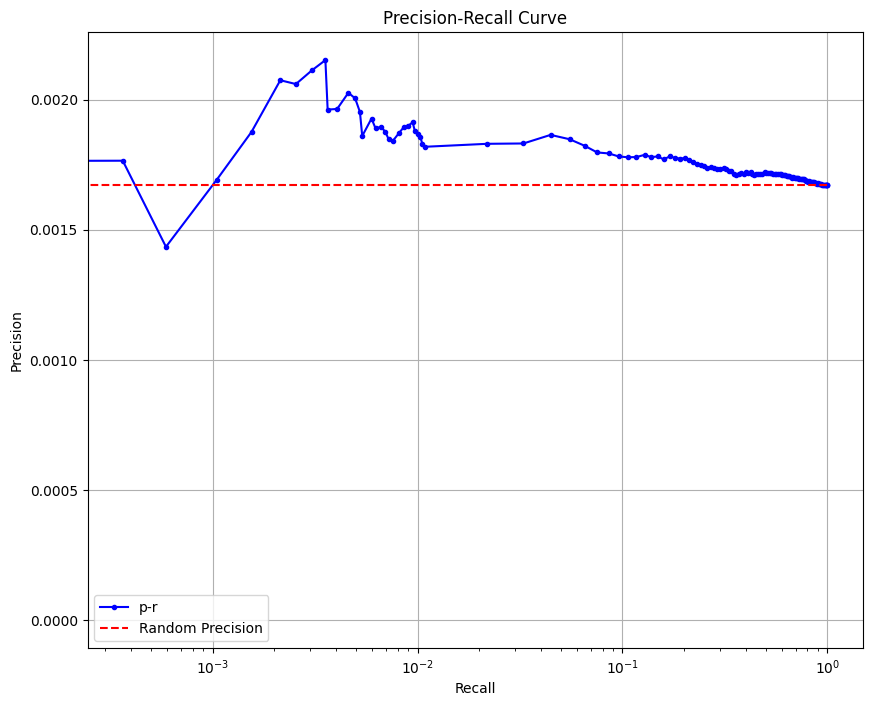

base enrichment
Top central genes: []


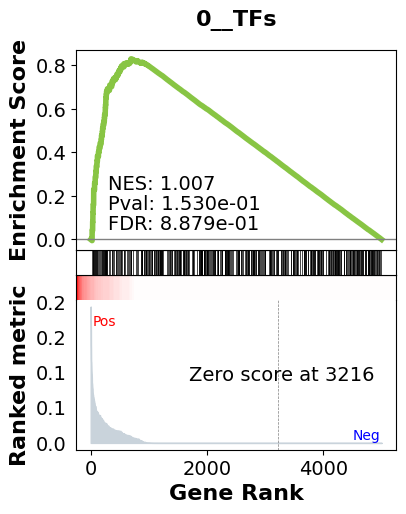

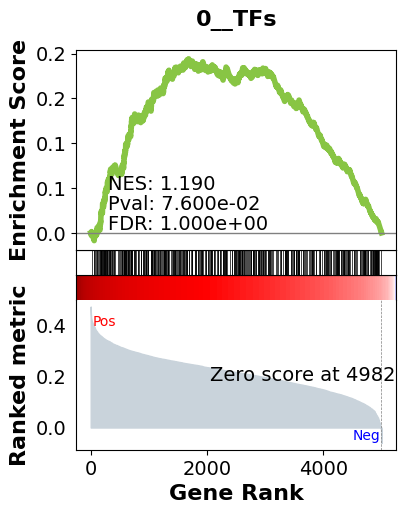

_________________________________________
TF specific enrichment
found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3625 genes
intersection pct: 0.725
precision:  0.007844427463632762 
recall:  0.5047575688595493 
random precision: 0.0016719951282636828


 99%|█████████▉| 127/128 [00:08<00:00, 14.49it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 15.50it/s]


Average Precision (AP):  0.004803397786176728
Area Under Precision-Recall Curve (AUPRC):  0.004709499637656696
EPR: 5.471622075679757


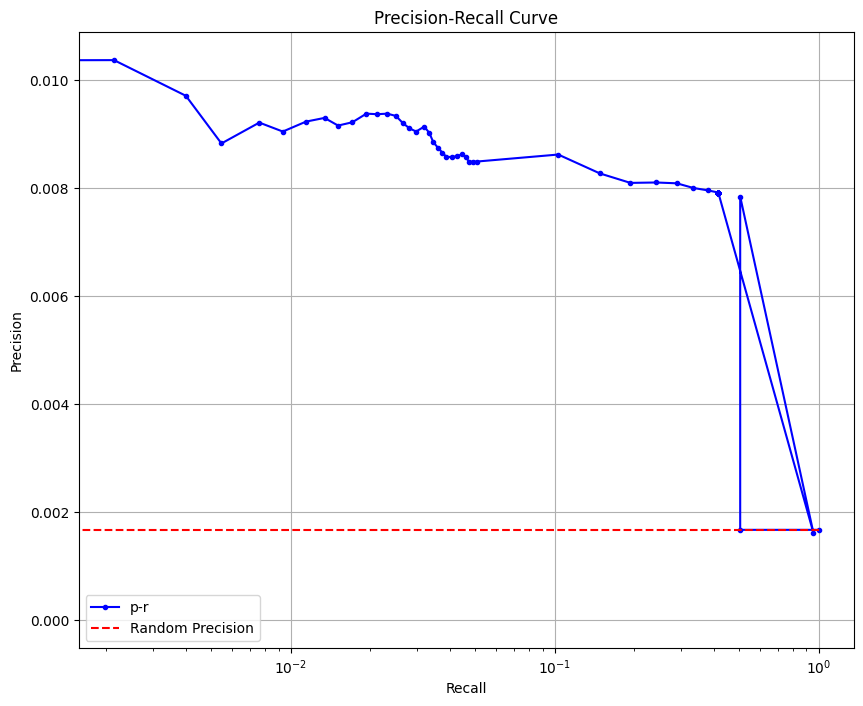

(4768, 23149)
Mvr
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 1.0353073676427205 mse_loss: 1.011641800403595 kl_loss: 0.023347026193126414 sparse_loss: 0.00031855504009096575
epoch: 2 0.9967773258686066 mse_loss: 0.9731202125549316 kl_loss: 0.02329768943794382 sparse_loss: 0.0003594026978438099
epoch: 4 0.6961327294508616 mse_loss: 0.6660345792770386 kl_loss: 0.029684668833700318 sparse_loss: 0.0004134851963802551
epoch: 5 0.6585044463475546 mse_loss: 0.6238288184007009 kl_loss: 0.034209390791753926 sparse_loss: 0.0004662127806417023
epoch: 7 0.43900632361570996 mse_loss: 0.3950744817654292 kl_loss: 0.043432360204557575 sparse_loss: 0.0004994769163507348
epoch: 8 0.3700598180294037 mse_loss: 0.3217012981573741 kl_loss: 0.047830931221445404 sparse_loss: 0.0005275987205095589
epoch: 10 0.3026682610313098 mse_loss: 0.24799874673287073 kl_loss: 0.05412713810801506 sparse_loss: 0.0005423862894531339
epoch: 11 0.45378127694129944 mse_loss: 0.3978726789355278 kl_loss: 0.055352939292788506 sparse_loss: 0.0005556574033107609
epoch: 13 0.329435581

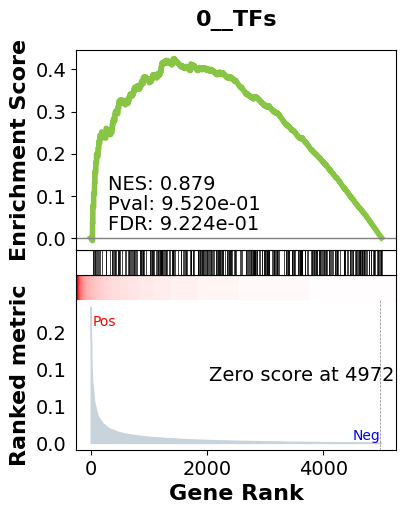

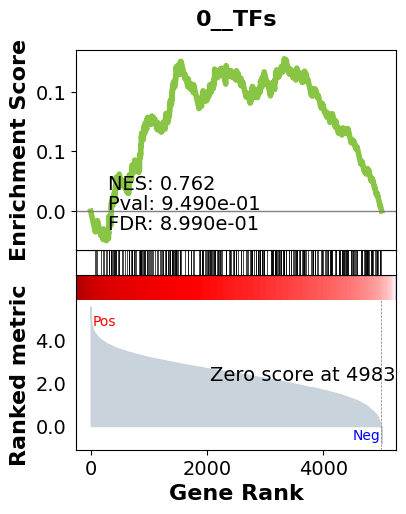

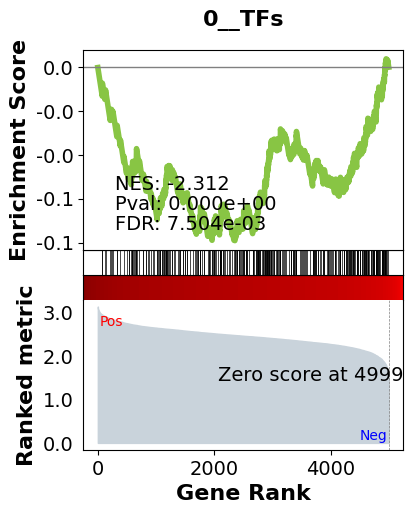

_________________________________________
TF specific enrichment
found some significant results for  4.25531914893617 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3603 genes
intersection pct: 0.7206
precision:  0.0015181068647987987 
recall:  0.9999492463076689 
random precision: 0.001518183918238287


 98%|█████████▊| 126/128 [00:09<00:00, 12.68it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 13.66it/s]


Average Precision (AP):  0.0014968857018605878
Area Under Precision-Recall Curve (AUPRC):  0.001496547676814176
EPR: 1.1706743602330307


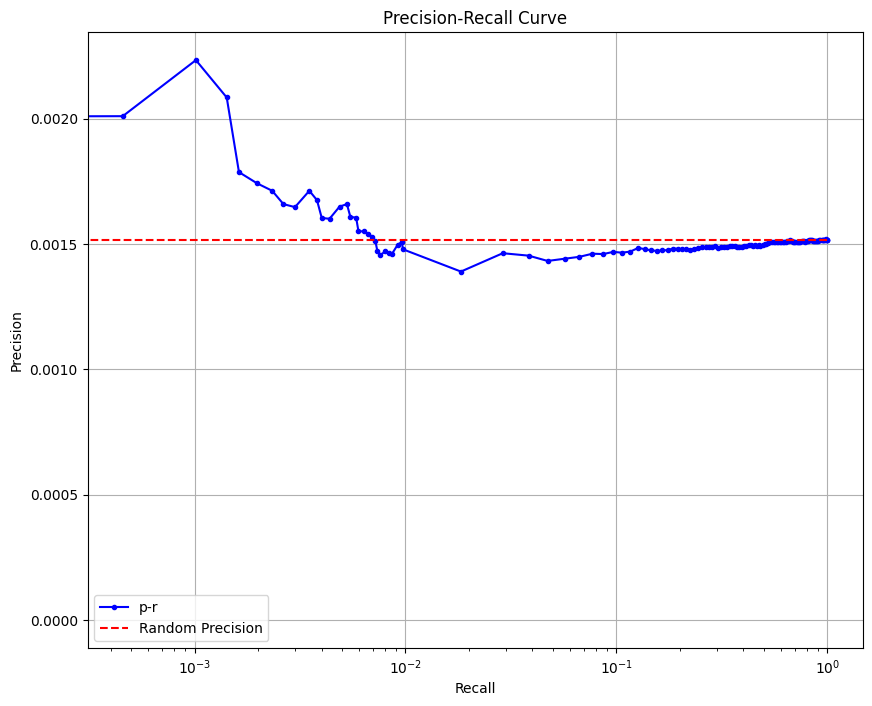

base enrichment
PowerIterationFailedConvergence


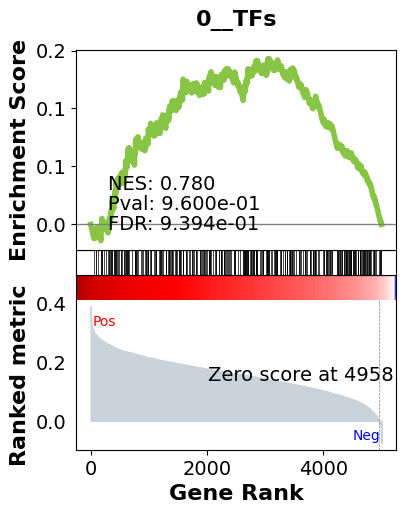

_________________________________________
TF specific enrichment
found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3603 genes
intersection pct: 0.7206
precision:  0.008508786409952429 
recall:  0.46043749682789425 
random precision: 0.001518183918238287


 99%|█████████▉| 127/128 [00:08<00:00, 16.59it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 15.20it/s]


Average Precision (AP):  0.004467177506949453
Area Under Precision-Recall Curve (AUPRC):  0.0043614888701611326
EPR: 5.17952972311798


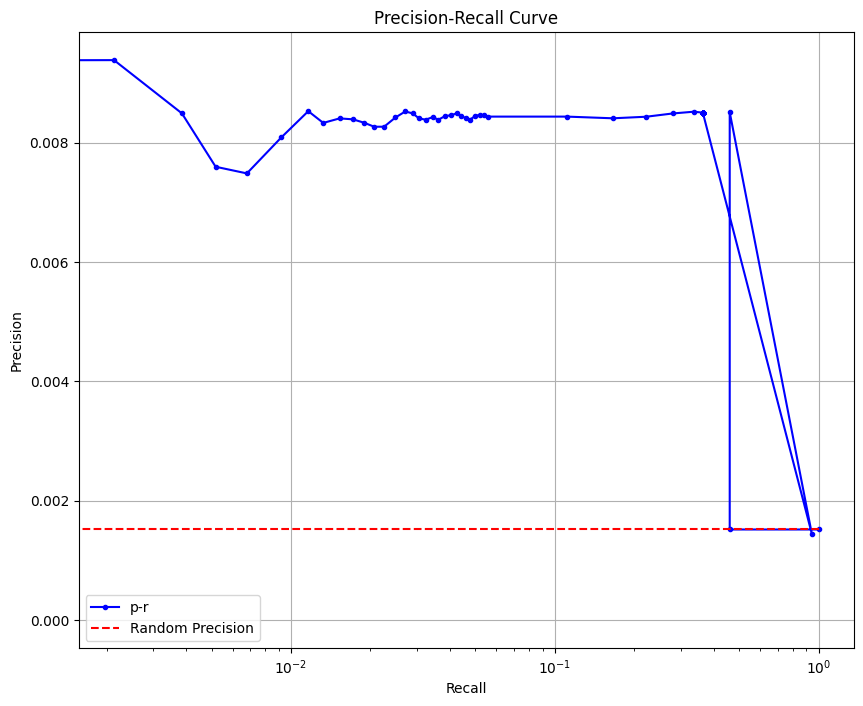

(4768, 23149)
l0W
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.7015453577041626 mse_loss: 0.6780155301094055 kl_loss: 0.023229809943586588 sparse_loss: 0.000299973355140537
epoch: 2 0.7019487619400024 mse_loss: 0.6784564852714539 kl_loss: 0.023204012177302502 sparse_loss: 0.0002882272528950125
epoch: 4 0.6928703188896179 mse_loss: 0.6694453358650208 kl_loss: 0.023131251538870856 sparse_loss: 0.0002937176323030144
epoch: 5 0.6944208741188049 mse_loss: 0.6709901094436646 kl_loss: 0.02311970025039045 sparse_loss: 0.0003110105753876269
epoch: 7 0.688910961151123 mse_loss: 0.6653931140899658 kl_loss: 0.02319406766036991 sparse_loss: 0.00032375092268921435
epoch: 8 0.6903541684150696 mse_loss: 0.6668314933776855 kl_loss: 0.023189611834823154 sparse_loss: 0.00033309304853901267
epoch: 10 0.6844799518585205 mse_loss: 0.6608361601829529 kl_loss: 0.023301507986616343 sparse_loss: 0.0003422581357881427
epoch: 11 0.6839789748191833 mse_loss: 0.6603423953056335 kl_loss: 0.023288248426979408 sparse_loss: 0.00034833047538995743
epoch: 13 0.67530900239

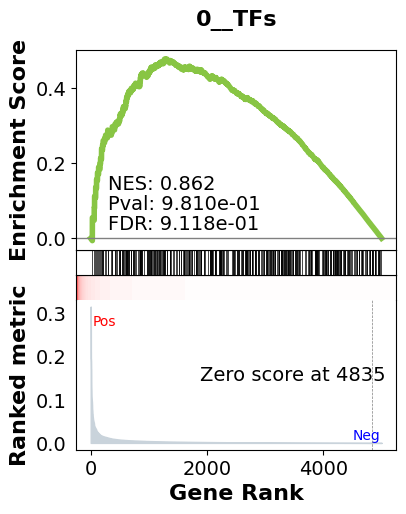

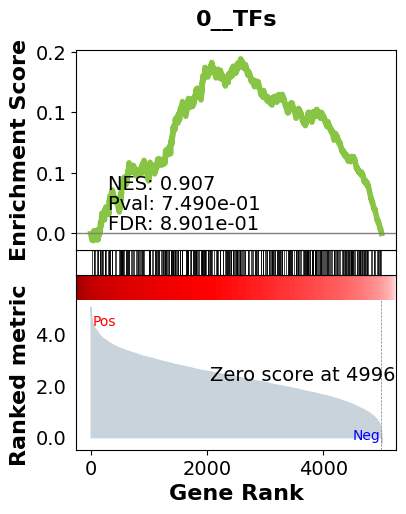

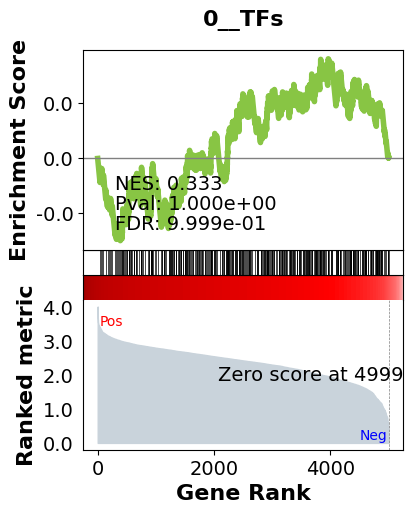

_________________________________________
TF specific enrichment
found some significant results for  19.51219512195122 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3553 genes
intersection pct: 0.7106
precision:  0.001303380850594473 
recall:  0.999878426843353 
random precision: 0.0013035393259851465


 98%|█████████▊| 126/128 [00:07<00:00, 14.79it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:07<00:00, 17.55it/s]


Average Precision (AP):  0.0013748802025024636
Area Under Precision-Recall Curve (AUPRC):  0.0013740592548903863
EPR: 0.979217888539476


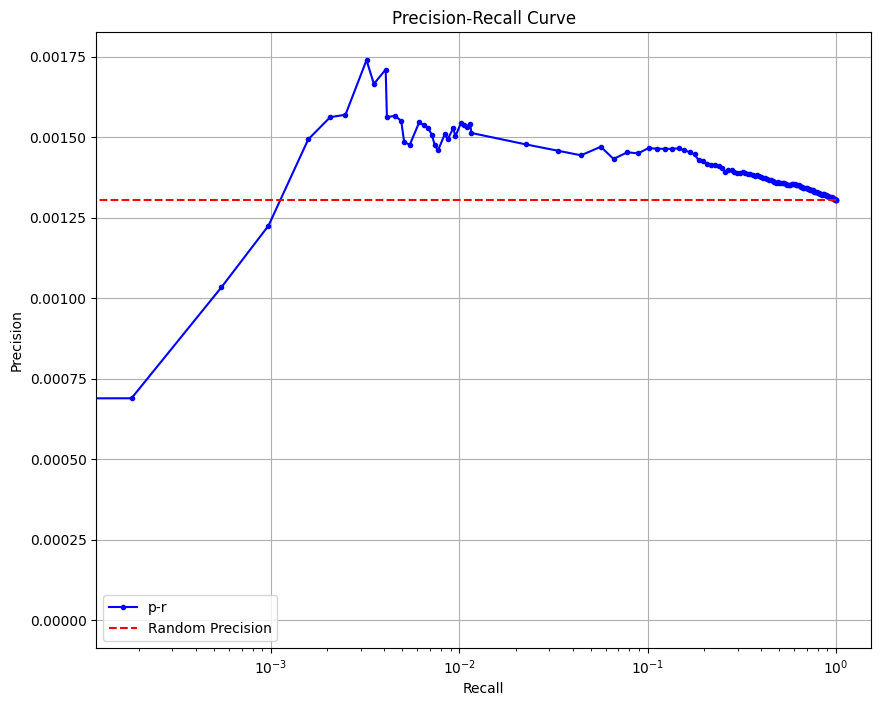

base enrichment
PowerIterationFailedConvergence


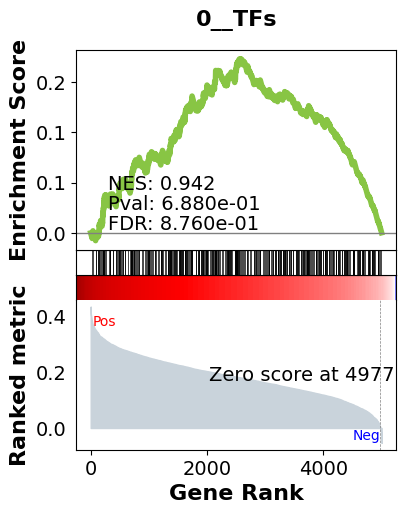

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3553 genes
intersection pct: 0.7106
precision:  0.006835811456155296 
recall:  0.5151054647133912 
random precision: 0.0013035393259851465


 98%|█████████▊| 126/128 [00:08<00:00, 13.78it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Average Precision (AP):  0.004375192813260949
Area Under Precision-Recall Curve (AUPRC):  0.004219959286511118
EPR: 6.527556229113249


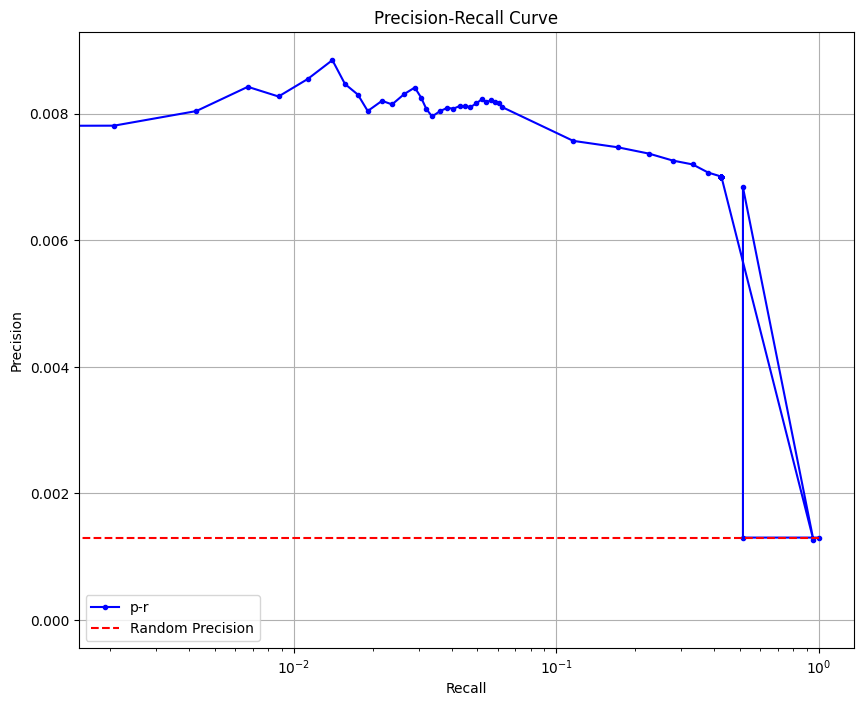

(4768, 23149)
pzz
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.6149327382445335 mse_loss: 0.5912999734282494 kl_loss: 0.02332059705076972 sparse_loss: 0.00031216371280606836
epoch: 2 0.78987255692482 mse_loss: 0.7661575525999069 kl_loss: 0.023351859374088235 sparse_loss: 0.00036311039002612233
epoch: 4 0.5301421396434307 mse_loss: 0.5052646920084953 kl_loss: 0.02449474629247561 sparse_loss: 0.00038269646756816655
epoch: 5 0.6512534767389297 mse_loss: 0.6263729482889175 kl_loss: 0.0244828927970957 sparse_loss: 0.0003976091102231294
epoch: 7 0.44542859494686127 mse_loss: 0.41898611932992935 kl_loss: 0.026030896289739758 sparse_loss: 0.000411595989135094
epoch: 8 0.48021259903907776 mse_loss: 0.4538570046424866 kl_loss: 0.025926561444066465 sparse_loss: 0.0004290320648578927
epoch: 10 0.29084647074341774 mse_loss: 0.26275889575481415 kl_loss: 0.027641087886877358 sparse_loss: 0.0004465030651772395
epoch: 11 0.2854190692305565 mse_loss: 0.2572862058877945 kl_loss: 0.027673010248690844 sparse_loss: 0.0004598578088916838
epoch: 13 0.174292685

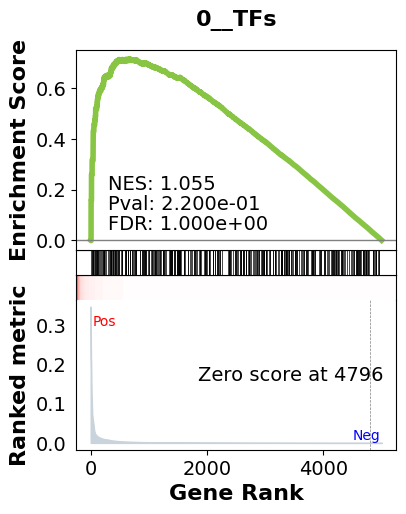

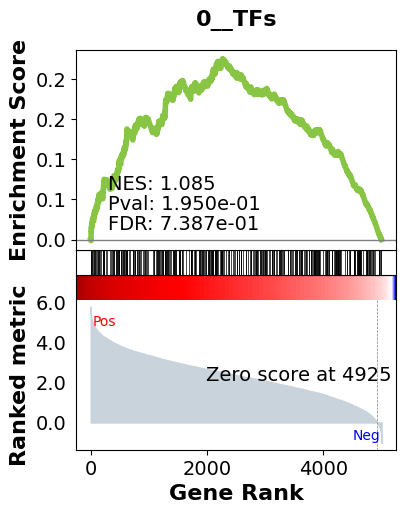

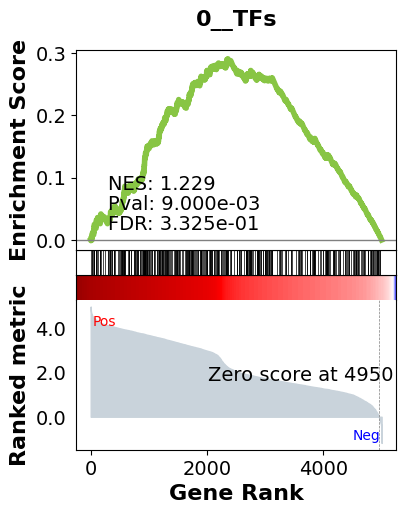

_________________________________________
TF specific enrichment
found some significant results for  57.142857142857146 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2606 genes
intersection pct: 0.5212
precision:  0.0010716447943104868 
recall:  1.0 
random precision: 0.0010716447943104868


 98%|█████████▊| 126/128 [00:04<00:00, 25.81it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:04<00:00, 25.86it/s]


Average Precision (AP):  0.0012430323254259254
Area Under Precision-Recall Curve (AUPRC):  0.0012422732000013773
EPR: 0.8976746742151799


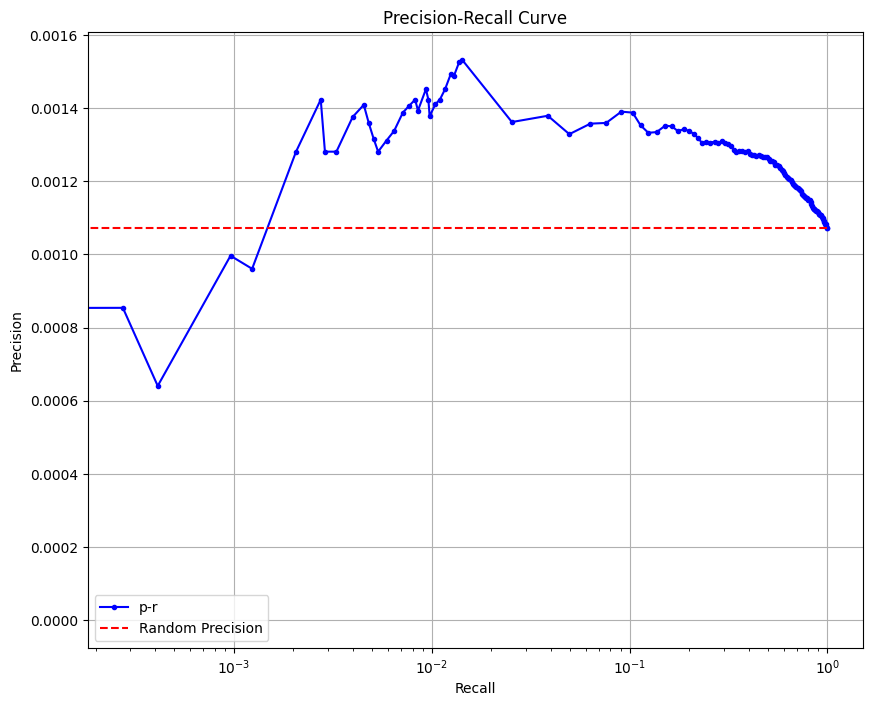

base enrichment
Top central genes: []


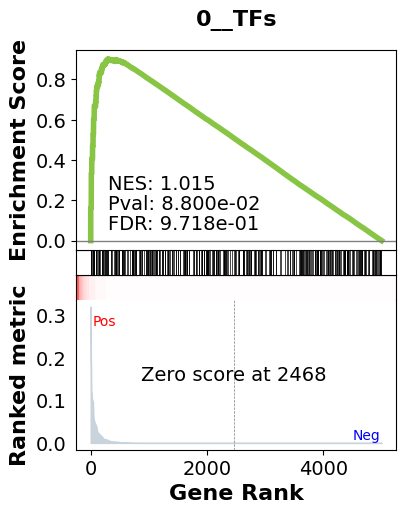

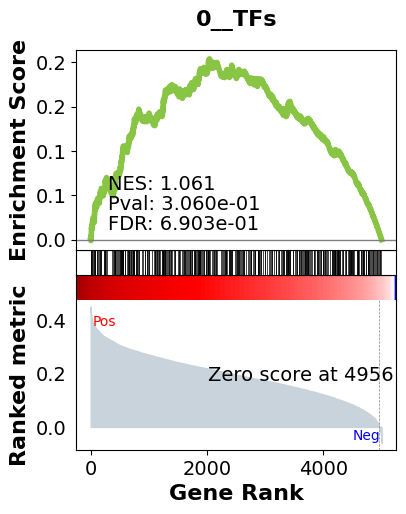

_________________________________________
TF specific enrichment
found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2606 genes
intersection pct: 0.5212
precision:  0.005195060472215156 
recall:  0.6175945017182131 
random precision: 0.0010716447943104868


 99%|█████████▉| 127/128 [00:04<00:00, 25.61it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:04<00:00, 25.84it/s]


Average Precision (AP):  0.004401023929873464
Area Under Precision-Recall Curve (AUPRC):  0.004308722814648582
EPR: 7.8078731218024355


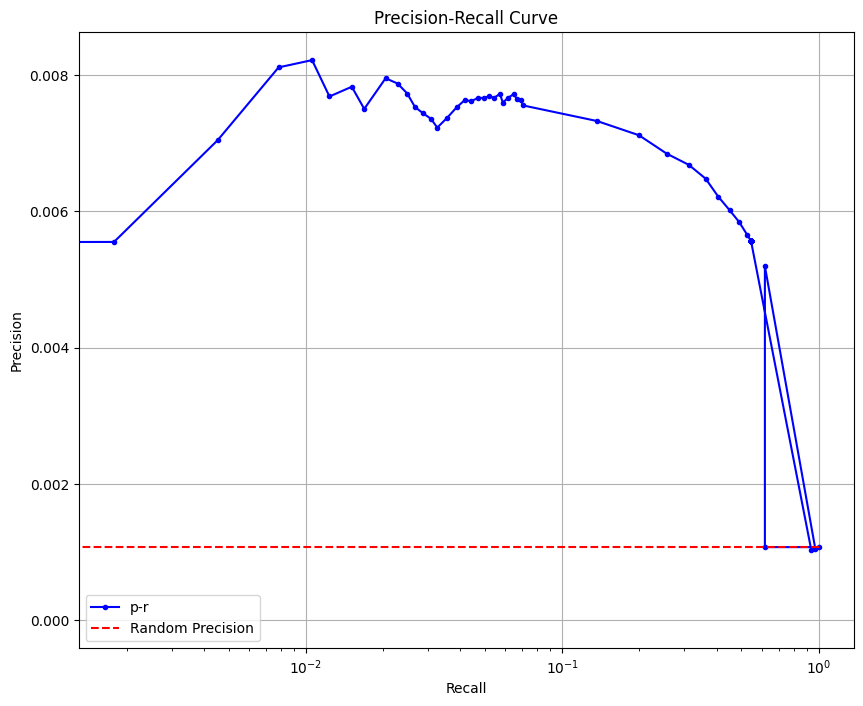

(4768, 23149)
sST
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.8722126086552938 mse_loss: 0.8486931721369425 kl_loss: 0.023215745265285175 sparse_loss: 0.00030368454948378104
epoch: 2 0.8800762295722961 mse_loss: 0.8565419514973959 kl_loss: 0.02320104202469035 sparse_loss: 0.0003332174868167688
epoch: 4 0.8363343874613444 mse_loss: 0.8121477762858073 kl_loss: 0.023827587836422026 sparse_loss: 0.00035897831548936665
epoch: 5 0.8429059187571207 mse_loss: 0.8187174598375956 kl_loss: 0.02379881146286304 sparse_loss: 0.00038963941430362564
epoch: 7 0.6574033498764038 mse_loss: 0.6310575604438782 kl_loss: 0.025930233687783282 sparse_loss: 0.0004155325780933102
epoch: 8 0.6567757328351339 mse_loss: 0.6299424767494202 kl_loss: 0.026388350718965132 sparse_loss: 0.0004448825881506006
epoch: 10 0.41136204202969867 mse_loss: 0.37998639543851215 kl_loss: 0.030906172314037878 sparse_loss: 0.00046947962255217135
epoch: 11 0.4004449248313904 mse_loss: 0.3670373062292735 kl_loss: 0.03291159371534983 sparse_loss: 0.0004960327059961855
epoch: 13 0.2686726

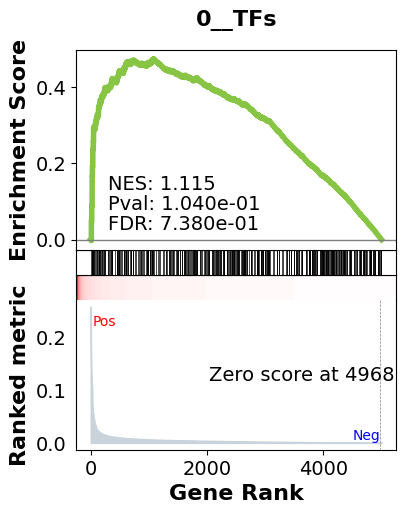

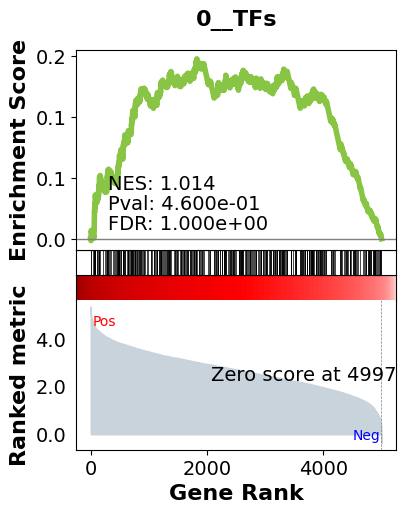

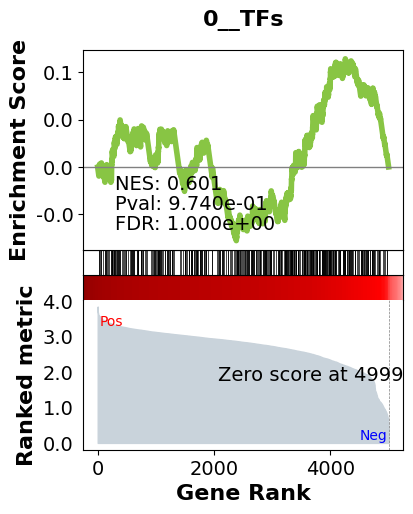

_________________________________________
TF specific enrichment
found some significant results for  28.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.001500791024308632 
recall:  0.9998936396511381 
random precision: 0.0015009506659450864


 98%|█████████▊| 126/128 [00:08<00:00, 13.45it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:08<00:00, 15.52it/s]


Average Precision (AP):  0.001560950251007291
Area Under Precision-Recall Curve (AUPRC):  0.001560910224158935
EPR: 1.0986859382709475


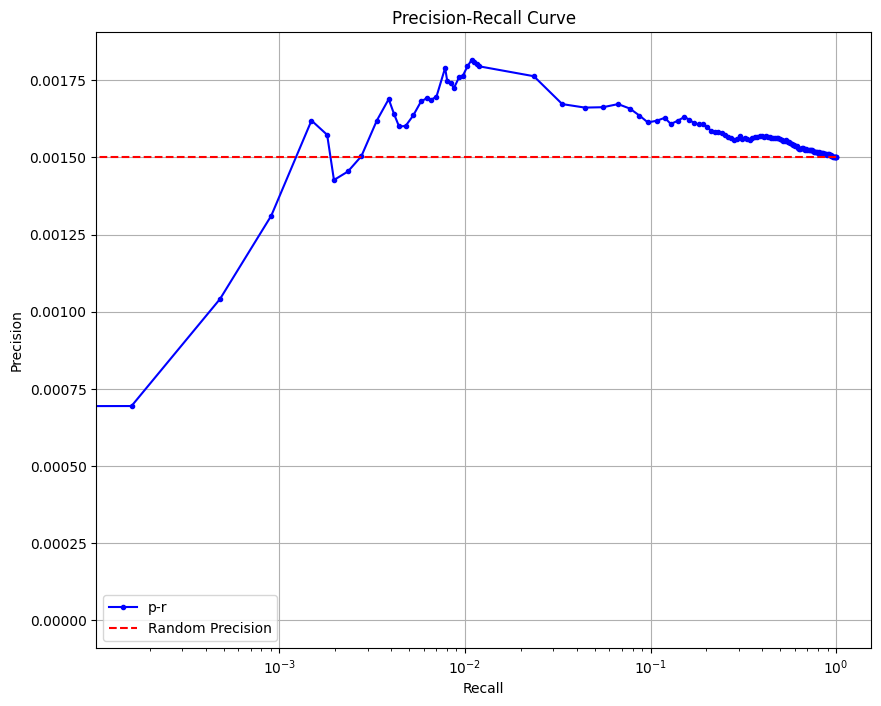

base enrichment
Top central genes: []


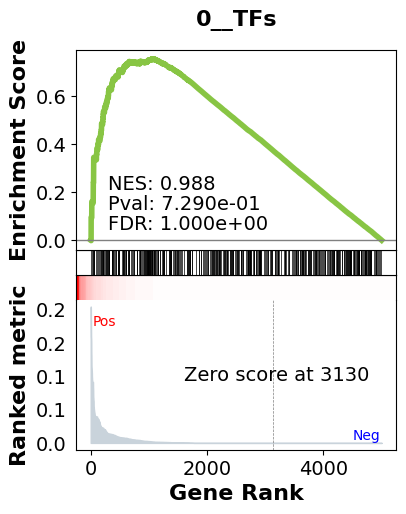

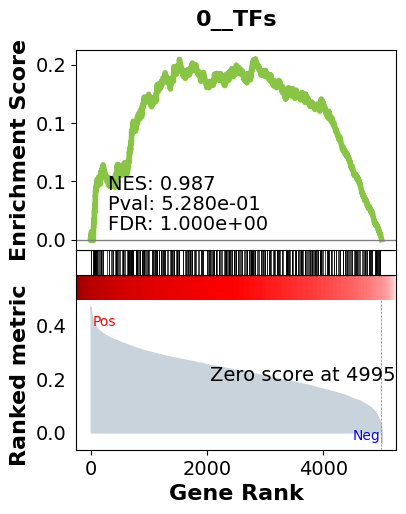

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.0075375509099059245 
recall:  0.5419059774516061 
random precision: 0.0015009506659450864


 98%|█████████▊| 126/128 [00:09<00:00, 13.93it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:09<00:00, 13.56it/s]


Average Precision (AP):  0.004789072687403563
Area Under Precision-Recall Curve (AUPRC):  0.004736494247735316
EPR: 6.923089905599474


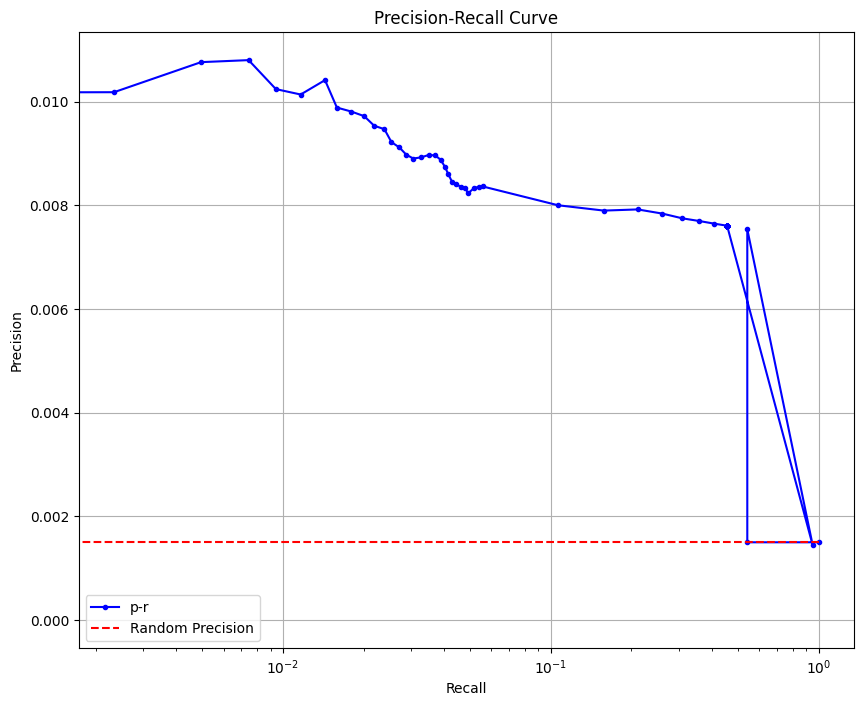

In [14]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
print(adata.shape)
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(adata.shape)
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['genie3_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [15]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [16]:
metrics

{'deepsem_kidney distal convoluted tubule epithelial cell': {'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Ionocytes',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Cholangiocytes'],
  'significant_enriched_TFtargets': 8.823529411764707,
  'precision': 0.0010620463635891406,
  'recall': 0.9998518079430943,
  'rand_precision': 0.001062203773751226,
  'auprc': 0.0010281938869451195,
  'ap': 0.001028944431712503,
  'epr': 1.0464565125934673},
 'genie3_kidney distal convoluted tubule epithelial cell': {'TF_enr': False,
  'enriched_terms_Targets': ['celltype.gmt__Melanocytes'],
  'significant_enriched_TFtargets': 5.882352941176471,
  'precisi

In [17]:
False
True
True
True
True
True
True
False
True
True
True
True
False
False
False
False
True
True


True

In [18]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name       EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell  1.046457  0.001028   
1     kidney distal convoluted tubule epithelial cell  4.781478  0.002126   
2   kidney loop of Henle thick ascending limb epit...  0.881938  0.001197   
3   kidney loop of Henle thick ascending limb epit...  5.574634  0.003135   
4               kidney collecting duct principal cell  1.127629  0.001359   
5               kidney collecting duct principal cell  6.784703  0.003753   
6                                      mesangial cell  0.937053  0.001084   
7                                      mesangial cell  5.766383  0.003869   
8                     blood vessel smooth muscle cell  1.198878  0.001727   
9                     blood vessel smooth muscle cell  5.471622  0.004709   
10                                           podocyte  1.170674  0.001497   
11                                           podocyte  5.179530  0.004361   
12                                         macrophage  0.979218  0.001374   
13                                         macrophage  6.527556  0.004220   
14                                          leukocyte  0.897675  0.001242   
15                                          leukocyte  7.807873  0.004309   
16                     kidney interstitial fibroblast  1.098686  0.001561   
17                     kidney interstitial fibroblast  6.923090  0.004736   

        RAND    TF_targ  TF_enr  TF_only  
0   0.001062   8.823529    True    False  
1   0.001062   5.882353   False    False  
2   0.001212   2.500000    True    False  
3   0.001212   0.000000   False    False  
4   0.001362   2.857143   False    False  
5   0.001362   8.571429   False    False  
6   0.001071  59.090909   False    False  
7   0.001071   6.818182   False    False  
8   0.001672  19.642857   False    False  
9   0.001672   3.571429   False    False  
10  0.001518   4.255319    True    False  
11  0.001518   6.382979   False    False  
12  0.001304  19.512195   False    False  
13  0.001304   0.000000   False    False  
14  0.001072  57.142857   False    False  
15  0.001072   4.761905   False    False  
16  0.001501  28.000000   False    False  
17  0.001501   0.000000   False    False